In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
routing = pd.read_csv('./results/routing.csv')

In [3]:
routing.head()

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
0,General-5-20221106-15:15:58-13240,runattr,NaN,NaN,configname,General,NaN,NaN,NaN
1,General-5-20221106-15:15:58-13240,runattr,NaN,NaN,datetime,20221106-15:15:58,NaN,NaN,NaN
2,General-5-20221106-15:15:58-13240,runattr,NaN,NaN,datetimef,20221106-151558,NaN,NaN,NaN
3,General-5-20221106-15:15:58-13240,runattr,NaN,NaN,experiment,General,NaN,NaN,NaN
4,General-5-20221106-15:15:58-13240,runattr,NaN,NaN,inifile,block.ini,NaN,NaN,NaN


In [4]:
def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

In [5]:
routing = pd.read_csv('./results/routing.csv', converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

In [6]:
vectors = routing[routing.type=='vector']
len(vectors)

630

In [7]:
vectors.name.unique(), vectors.module.unique()

(array(['queueLength:vector', 'amount:vector', 'delayedJobs:vector',
        'busy:vector', 'queueingTime:vector'], dtype=object),
 array(['Block.alloca', 'Block.risorse', 'Block.is', 'Block.servente'],
       dtype=object))

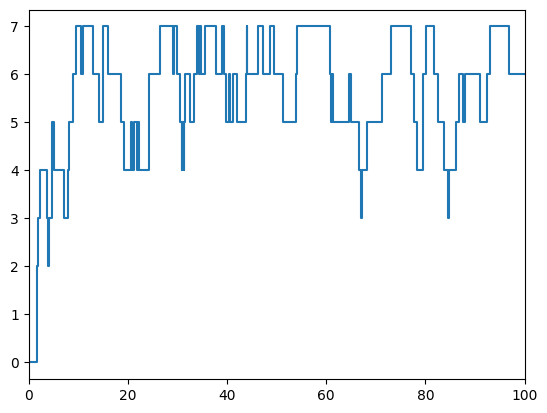

In [8]:
vec = vectors[vectors.name == 'queueLength:vector'].iloc[4]  # take some vector
plt.plot(vec.vectime, vec.vecvalue, drawstyle='steps-post')
plt.xlim(0,100)
plt.show()

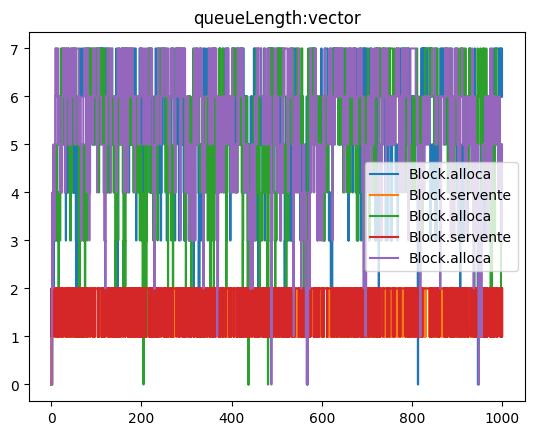

In [9]:
somevectors = vectors[vectors.name == 'queueLength:vector'][:5]
for row in somevectors.itertuples():
    plt.plot(row.vectime, row.vecvalue, drawstyle='steps-post')
plt.title(somevectors.name.values[0])
plt.legend(somevectors.module)
plt.show()

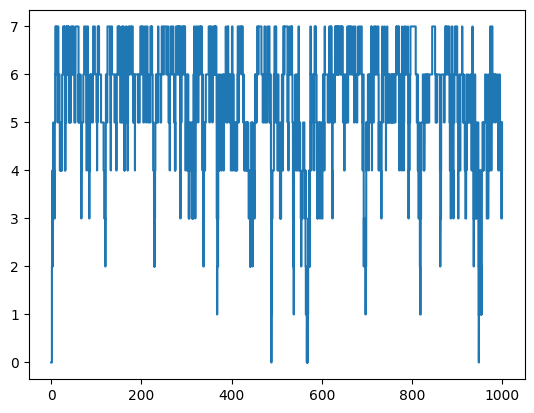

In [11]:
vec = vectors[vectors.name == 'queueLength:vector'].iloc[4]  # take some vector
plt.plot(vec.vectime, vec.vecvalue, drawstyle='steps-post')
plt.show()

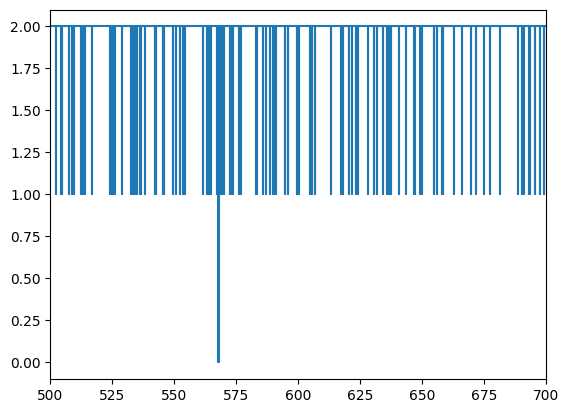

In [12]:
vec = vectors[vectors.name == 'queueLength:vector'].iloc[5]  # take some vector
plt.plot(vec.vectime, vec.vecvalue, drawstyle='steps-post')
plt.xlim(500, 700)
plt.show()

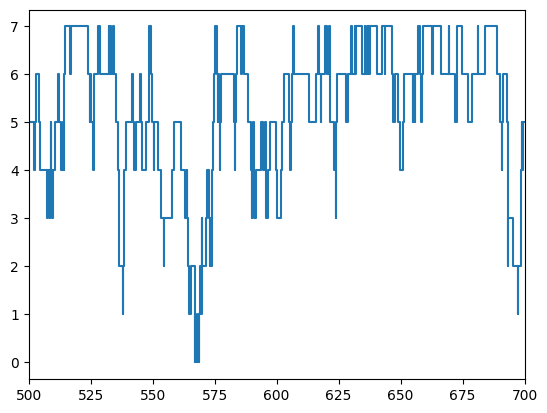

In [13]:
vec = vectors[vectors.name == 'queueLength:vector'].iloc[4]  # take some vector
plt.plot(vec.vectime, vec.vecvalue, drawstyle='steps-post')
plt.xlim(500, 700)
plt.show()

In [14]:
def running_avg(x):
    return np.cumsum(x) / np.arange(1, x.size + 1)

def running_timeavg(t,x):
    dt = t[1:] - t[:-1]
    return np.cumsum(x[:-1] * dt) / t[1:]

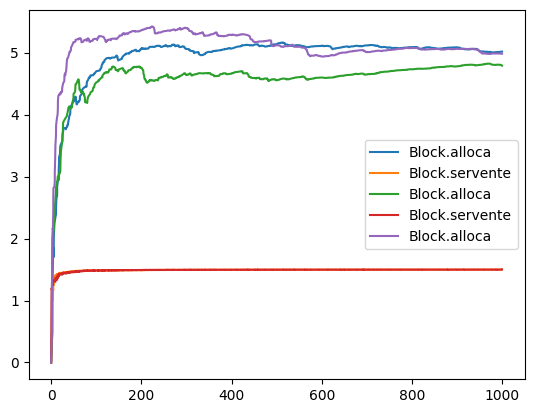

In [15]:
vecs = vectors[vectors.name == 'queueLength:vector'][:5]

for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.legend(vecs.module)
plt.show()

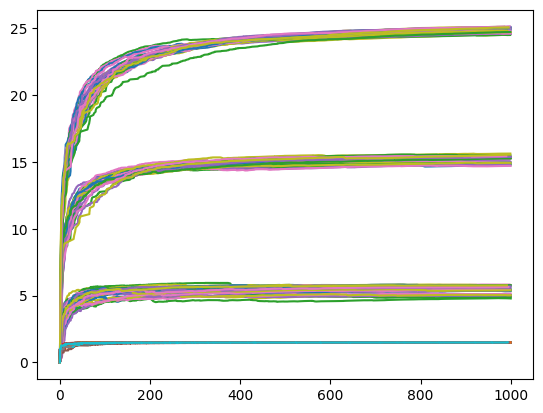

In [16]:
vecs = vectors[vectors.name == 'queueLength:vector']

for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
# plt.legend(vecs.module)
plt.show()

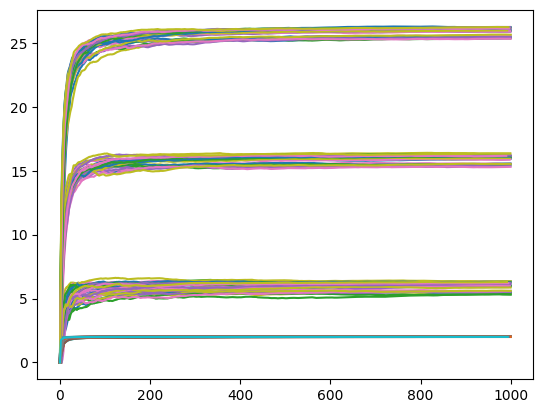

In [17]:
for row in vecs.itertuples():
    plt.plot(row.vectime[1:], running_timeavg(row.vectime, row.vecvalue))  
plt.show()

In [18]:
vecs = vectors[vectors.name == 'queueLength:vector']

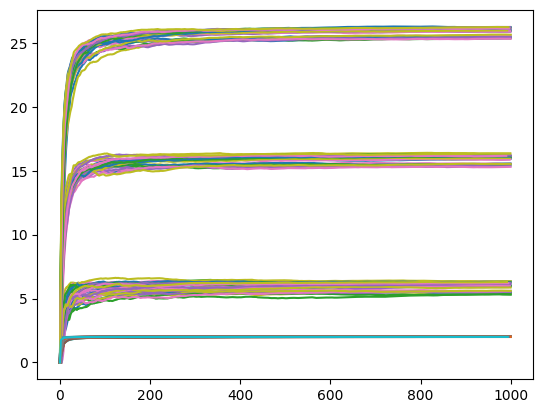

In [19]:
vecs = vectors[vectors.name == 'queueLength:vector']
for row in vecs.itertuples():
    plt.plot(row.vectime[1:], running_timeavg(row.vectime, row.vecvalue))  
plt.show()

In [20]:
# vecs = vectors[vectors.name == 'queueLength:vector'][:5]

# for row in vecs.itertuples():
#     plt.plot(row.vectime, running_avg(row.vecvalue))
# plt.legend(vecs.module, vecs.measurement, vecs.replication)
# plt.show()

In [21]:
vecs = vectors[vectors.name == 'queueLength:vector'][:5]
display(vecs)

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
10800,General-0-20221106-15:15:58-13240,vector,Block.alloca,queueLength:vector,NaN,None,NaN,"[0.0, 2.695681165452, 2.769669394412, 2.931019...","[0.0, 1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 1.0, 2.0, ..."
10812,General-0-20221106-15:15:58-13240,vector,Block.servente,queueLength:vector,NaN,None,NaN,"[0.0, 2.361603419946, 2.387623513697, 3.729464...","[0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, ..."
10830,General-1-20221106-15:15:58-13240,vector,Block.alloca,queueLength:vector,NaN,None,NaN,"[0.0, 1.618817479536, 1.709539939896, 1.805309...","[0.0, 1.0, 2.0, 1.0, 2.0, 3.0, 4.0, 3.0, 4.0, ..."
10842,General-1-20221106-15:15:58-13240,vector,Block.servente,queueLength:vector,NaN,None,NaN,"[0.0, 0.476128791679, 0.807911873029, 0.823555...","[0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, ..."
10860,General-2-20221106-15:15:58-13240,vector,Block.alloca,queueLength:vector,NaN,None,NaN,"[0.0, 1.71450095437, 1.718075968882, 1.9893039...","[0.0, 1.0, 2.0, 3.0, 4.0, 3.0, 2.0, 3.0, 4.0, ..."


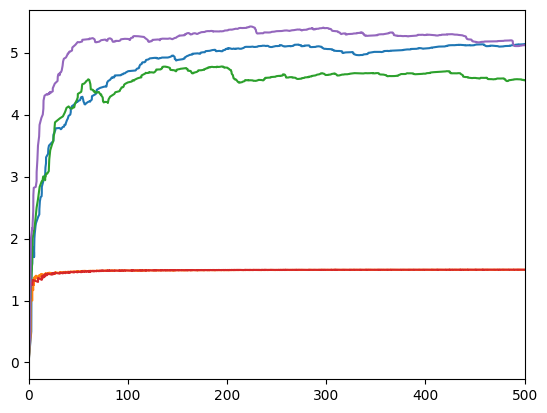

In [22]:
for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
# plt.legend(vecs.module, vecs.run)
plt.xlim(0,500)
plt.show()

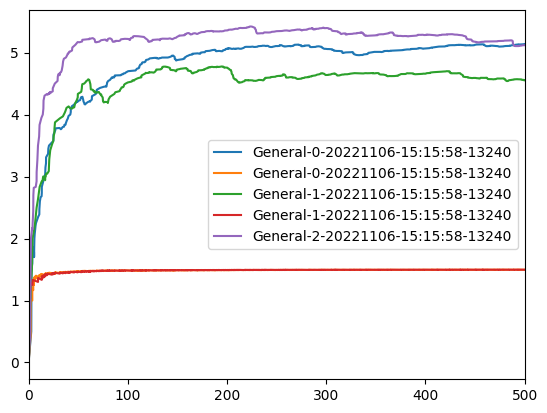

In [23]:
for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.legend(vecs.run)
plt.xlim(0,500)
plt.show()

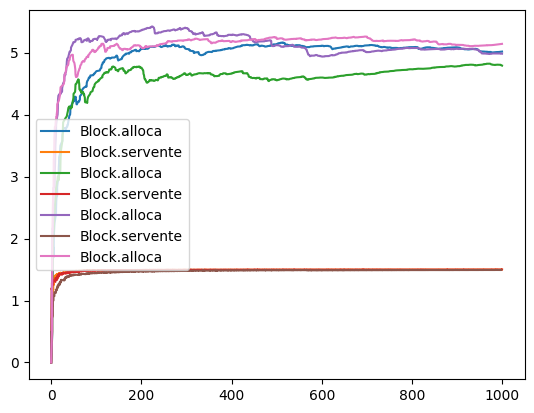

In [24]:
vecs = vectors[vectors.name == 'queueLength:vector'][:7]

for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.legend(vecs.module)
plt.show()

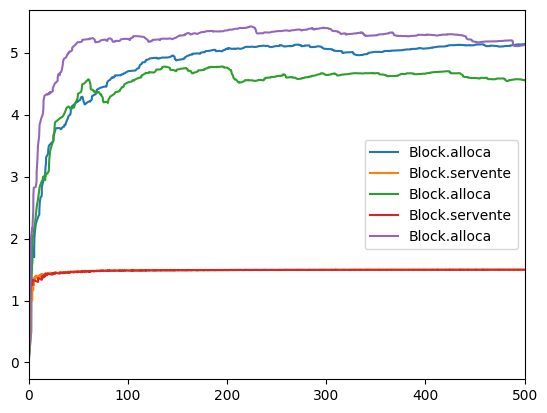

In [25]:
vecs = vectors[vectors.name == 'queueLength:vector'][:5]

for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.legend(vecs.module)
plt.xlim(0,500)
plt.show()

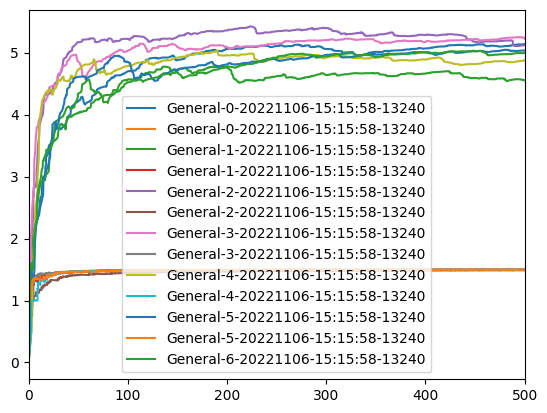

In [26]:
vecs = vectors[vectors.name == 'queueLength:vector'][:13]

for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.legend(vecs.run)
plt.xlim(0,500)
plt.show()

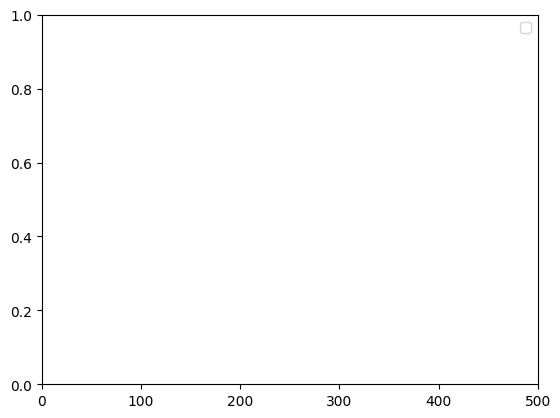

In [27]:
vecs = vectors[vectors.module == 'prova2.allocate'][:5]

for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.legend(vecs.module)
plt.xlim(0,500)
plt.show()

In [28]:
display(vecs)

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue


In [29]:
vecs = vectors[vectors.module == 'prova2.allocate']
display(vecs)

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue


In [30]:
# vecs = vectors[vectors.module == 'prova2.allocate', vectors.name == 'queueLength:vector']
# display(vecs)

In [31]:
vec = vectors[vectors.module == 'prova2.allocate']
vecs = vec[vec.name == 'queueLength:vector']
display(vecs)

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue


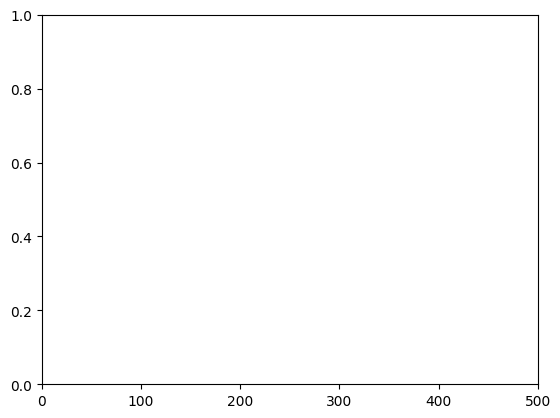

In [32]:
for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.xlim(0,500)
plt.show()

In [33]:
for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.show()

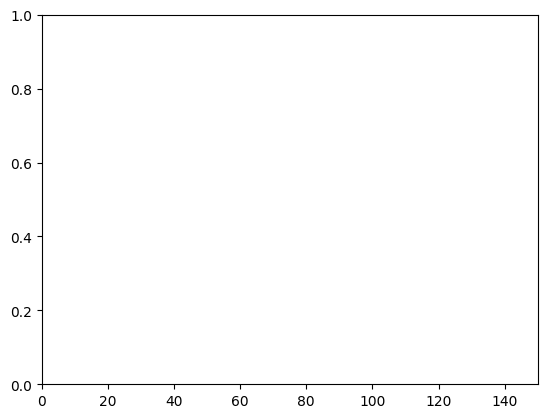

In [34]:
for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.xlim(0,150)
plt.show()

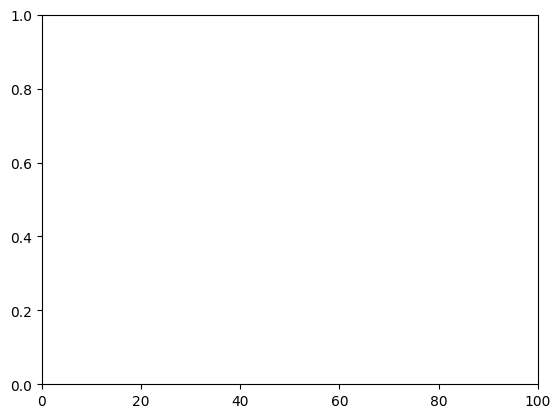

In [35]:
for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.xlim(0,100)
plt.show()

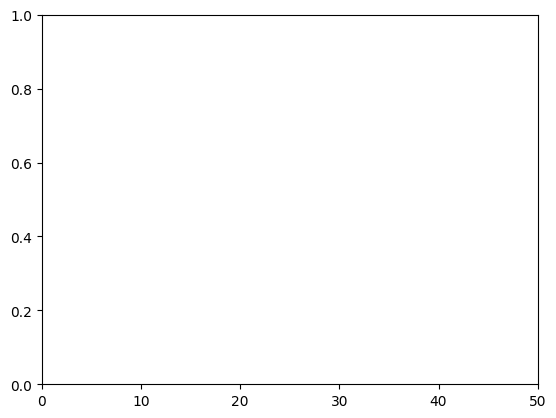

In [36]:
for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.xlim(0,50)
plt.show()

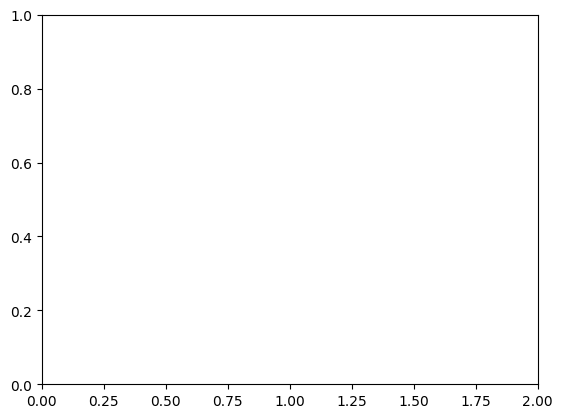

In [37]:
for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.xlim(0,2)
plt.show()

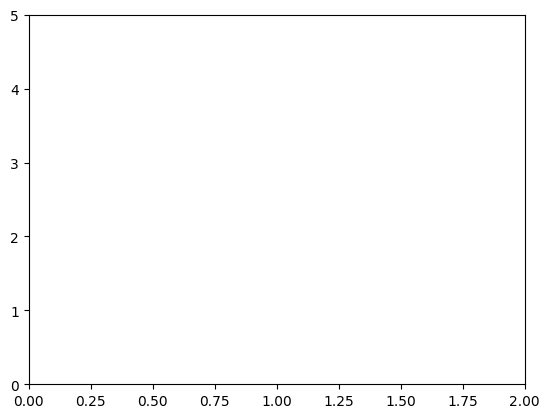

In [38]:
for row in vecs.itertuples():
    plt.plot(row.vectime, running_avg(row.vecvalue))
plt.xlim(0,2)
plt.ylim(0,5)
plt.show()